In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("HappinessAlcoholConsumption.csv")

In [3]:
data.head()

,Country,Region,Hemisphere,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
0,Denmark,Western Europe,north,7.526,928,53.579,224,81,278
1,Switzerland,Western Europe,north,7.509,943,79.866,185,100,280
2,Iceland,Western Europe,north,7.501,933,60.530,233,61,78
3,Norway,Western Europe,north,7.498,951,70.890,169,71,129
4,Finland,Western Europe,north,7.413,918,43.433,263,133,97


In [4]:
data.describe()

,HappinessScore,HDI,GDP_PerCapita,Beer_PerCapita,Spirit_PerCapita,Wine_PerCapita
count,122.000000,122.000000,122.000000,122.000000,122.000000,122.000000
mean,5.524828,740.877049,91.482836,137.565574,96.598361,66.598361
std,1.148736,149.846124,209.577313,104.817353,81.435028,88.121503
min,3.069000,351.000000,1.029000,1.000000,1.000000,1.000000
25%,4.528250,663.750000,4.134250,38.250000,25.500000,5.000000
50%,5.542000,757.500000,12.016000,125.500000,82.500000,16.000000
75%,6.477000,861.500000,41.990000,224.750000,142.500000,112.750000
max,7.526000,951.000000,953.000000,376.000000,373.000000,370.000000


In [5]:
useful_data = data[["HDI", "HappinessScore"]] 

In [6]:
useful_data

,HDI,HappinessScore
0,928,7.526
1,943,7.509
2,933,7.501
3,951,7.498
4,918,7.413
...,...,...
117,533,3.666
118,432,3.622
119,512,3.484
120,500,3.303


In [7]:
matrix = np.array(useful_data.values, "float")

In [8]:
matrix[0:5, ]

array([[928.   ,   7.526],
       [943.   ,   7.509],
       [933.   ,   7.501],
       [951.   ,   7.498],
       [918.   ,   7.413]])

In [9]:
x = matrix[:, 0]
y = matrix[:, 1]

In [10]:
x = x/np.max(x)

In [11]:
print(x)


[0.97581493 0.9915878  0.98107256 1.         0.96529968 0.96950578
 0.97581493 0.96214511 0.98633018 0.98002103 0.94847529 0.95268139
 0.96950578 0.83175605 0.98212408 0.79705573 0.96214511 0.98212408
 0.95057834 0.81177708 0.97791798 0.96740273 0.88538381 0.8254469
 0.86435331 0.93059937 0.9064143  0.84332282 0.92008412 0.78548896
 0.94532072 0.78654048 0.89905363 0.93480547 0.68243954 0.75604627
 0.88958991 0.8254469  0.80546793 0.89695058 0.71398528 0.69085174
 0.73922187 0.9232387  0.78759201 0.74553102 0.95373291 0.83806519
 0.73291272 0.85699264 0.90431125 0.94637224 0.72450053 0.89905363
 0.84647739 0.94006309 0.78654048 0.74132492 0.82860147 0.88748686
 0.91167192 0.73817035 0.84858044 0.91272345 0.76971609 0.87066246
 0.82754995 0.77287066 0.79600421 0.7318612  0.78654048 0.70347003
 0.8254469  0.80546793 0.85173502 0.77076761 0.69610936 0.87802313
 0.79179811 0.88853838 0.79495268 0.72450053 0.76971609 0.91272345
 0.78128286 0.5573081  0.64563617 0.61619348 0.82229232 0.43427

Text(0.5, 1.0, 'HappinessScore vs HDI')

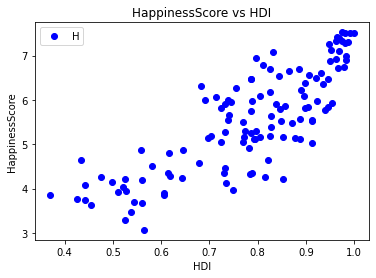

In [12]:
plt.plot(x,y,"bo")
plt.xlabel("HDI")
plt.ylabel("HappinessScore")
plt.legend("HappinessScore")
plt.title("HappinessScore vs HDI")

In [13]:
def ComputeCost(x, y, theta):
    a = 1/(2*m)
    b = np.sum(((x@theta)-y)**2)
    j = a*b
    return j

In [14]:
m = np.size(y)

x = x.reshape([122,1])
X = np.hstack([np.ones_like(x), x])



In [15]:
theta = np.zeros([2,1])

In [16]:
print(ComputeCost(X,y,theta))

1941.7825705000002


In [17]:
def gradient(x,y,theta):
    alpha = 0.00001
    iteration = 2000

    J_history = np.zeros([iteration, 1]);
    for iter in range(0,2000):
        error = (x @ theta) -y
        temp0 = theta[0] - ((alpha/m) * np.sum(error*x[:,0]))
        temp1 = theta[1] - ((alpha/m) * np.sum(error*x[:,1]))
        theta = np.array([temp0,temp1]).reshape(2,1)
        J_history[iter] = (1 / (2*m) ) * (np.sum(((x @ theta)-y)**2))   
    return theta, J_history

In [18]:
theta, j = gradient(X,y,theta)
theta


array([[3.24042413],
       [2.8815171 ]])

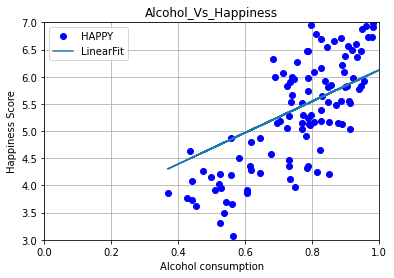

In [19]:
plt.plot(x,y,'bo')
plt.plot(x,X@theta,'-')
plt.axis([0,1,3,7])
plt.ylabel('Happiness Score')
plt.xlabel('Alcohol consumption')
plt.legend(['HAPPY','LinearFit'])
plt.title('Alcohol_Vs_Happiness')
plt.grid()
plt.show()